In [ ]:
from google.colab import files 
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets list 

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          12374        358  1.0              
whenamancodes/hr-employee-attrition                            Employee Analysis | Attrition Report                 50KB  2022-09-12 10:46:33            992         29  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           4175        105  1.0              
whenamancodes/student-performance                              St

In [ ]:
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset

 80% 97.0M/121M [00:00<00:00, 141MB/s]
100% 121M/121M [00:00<00:00, 166MB/s] 


In [ ]:
!unzip /content/face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import matplotlib.image as mimg 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
picture_size = 48
path = '/gdrive/MyDrive/images/'

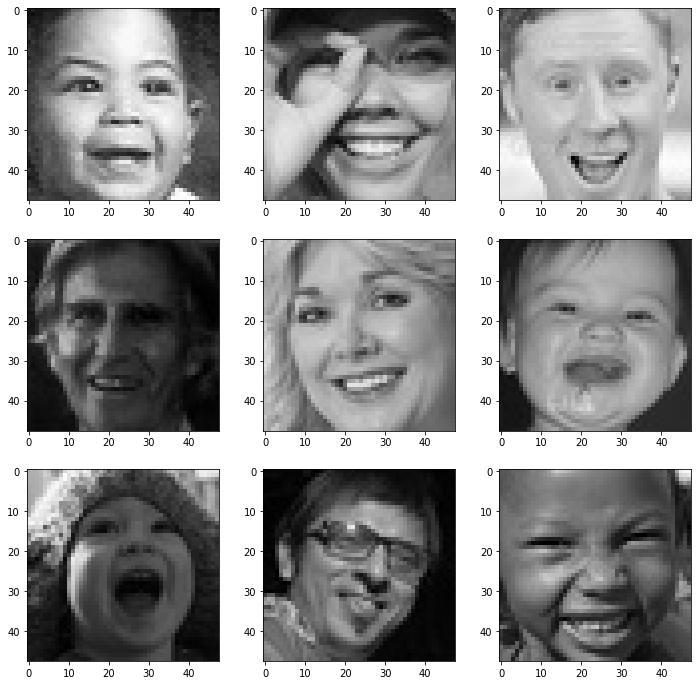

In [ ]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

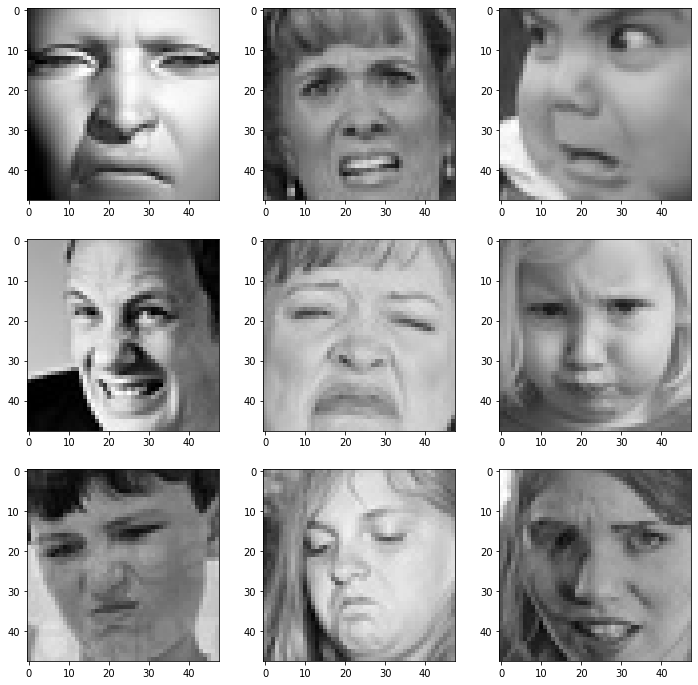

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

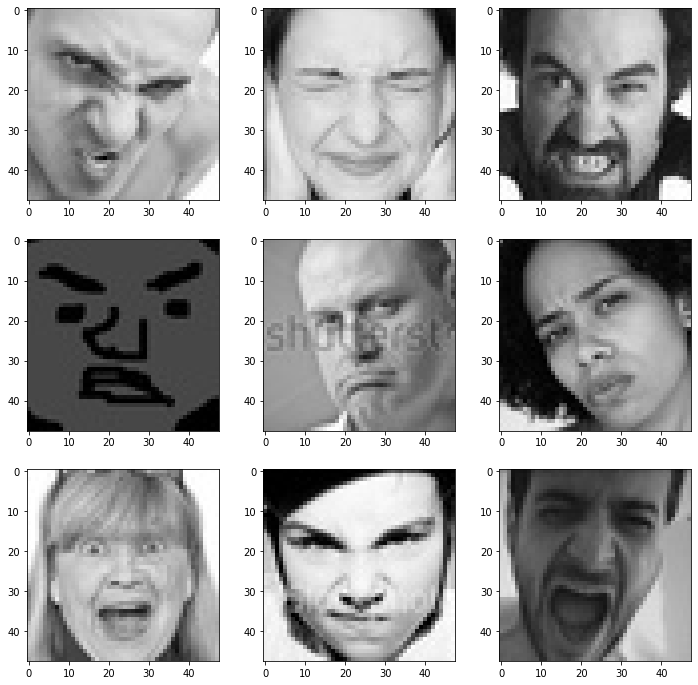

In [ ]:
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

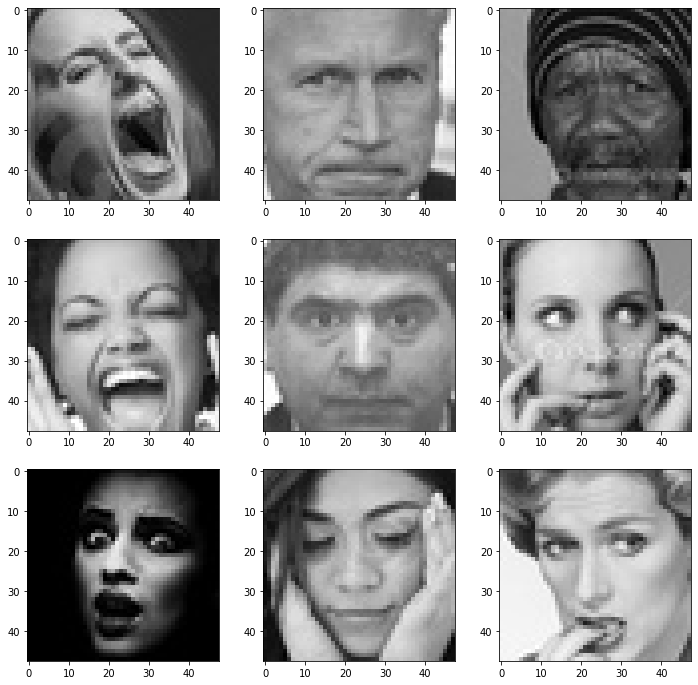

In [ ]:
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

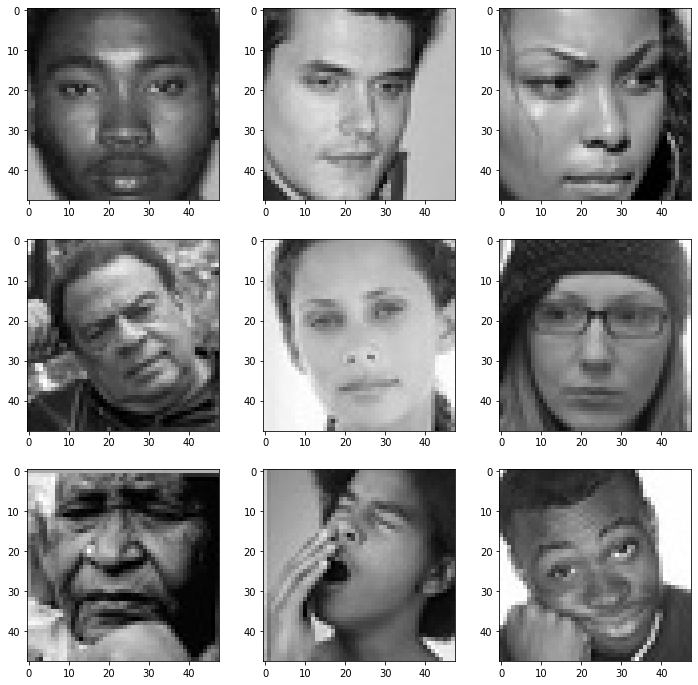

In [ ]:
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

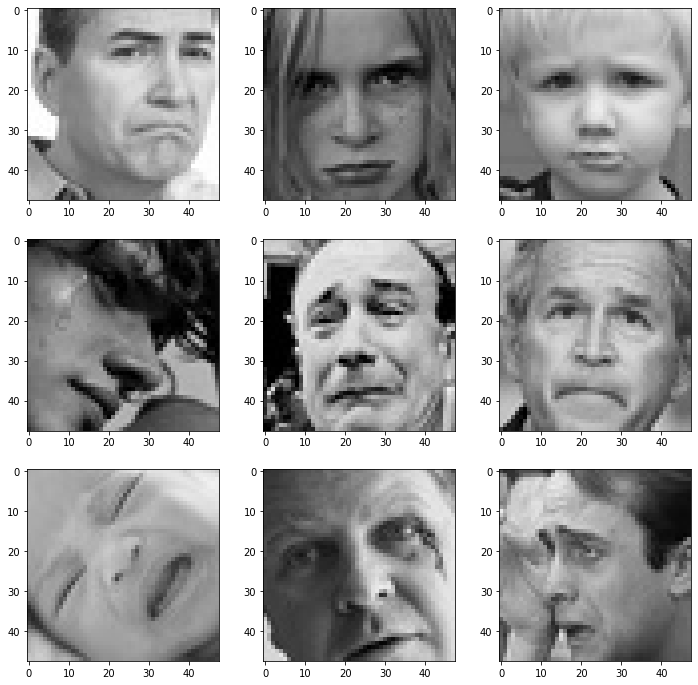

In [ ]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

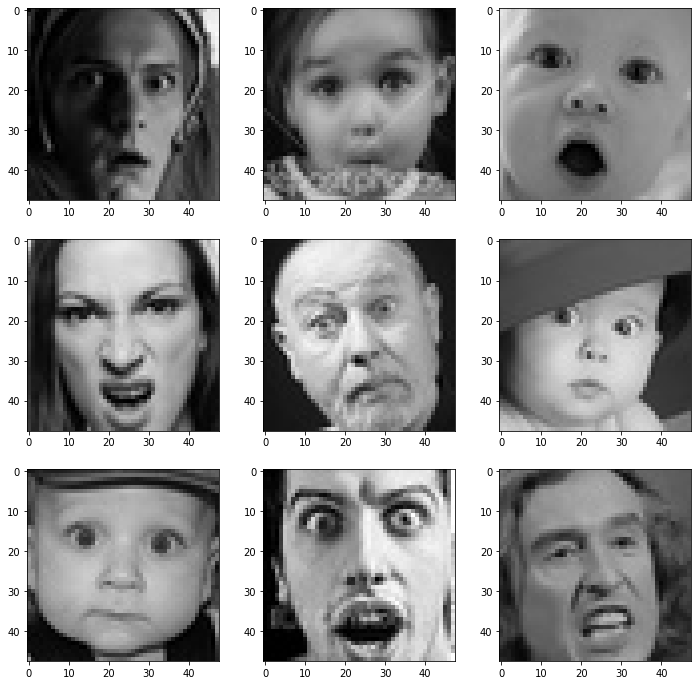

In [ ]:
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

(48, 48)
(1, 2304)


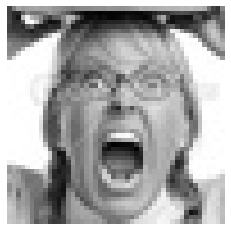

In [ ]:
path = '/gdrive/MyDrive/images/train/angry/27537.jpg'

im = mimg.imread(path)


print(im.shape)

plt.figure(1)
plt.imshow(im,cmap='gray')
plt.axis('off')


feat = im.reshape(1,-1) 
print(feat.shape)

In [ ]:

Classes = 3

X = np.zeros((7906,2304))
images = np.zeros((7906,48,48))
target = np.zeros((7906))

className = ['angry','disgust','fear']

rangeData = [430,430,430]

count = -1
for i in range(1,Classes+1,1):

  classNm = className[i-1]
  samples = rangeData[i-1]
  

  for j in range(1,samples+1,1):
    path = '/gdrive/MyDrive/images/train/'+ classNm + '/'
    dir_list = os.listdir(path)
    pathname, extension = os.path.splitext(dir_list[j-1])
    path = '/gdrive/MyDrive/images/train/'+ classNm + '/' + dir_list[j-1]
  
    im = mimg.imread(path)

   
    feat = im.reshape(1,-1)
    
   
    X[count,:] = feat
    images[count,:,:]=im
    target[count]=i-1
    count = count+1

In [ ]:
print(feat.shape)
print()
print(images.shape)
print()
print(target.shape)

(1, 2304)

(7906, 48, 48)

(7906,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm 

In [ ]:

Xtrain,Xtest,ytrain,ytest = train_test_split(X,target,test_size=0.3,random_state=10)

print(Xtrain.shape,Xtest.shape)
print()
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)
print()

(5534, 2304) (2372, 2304)

(5534, 2304) (5534,)
(2372, 2304) (2372,)



In [ ]:
svmModel = svm.SVC(kernel='poly',C=2)
svmModel = svmModel.fit(Xtrain,ytrain)
op  = svmModel.predict(Xtest)
acc = metrics.accuracy_score(ytest,op)
print('Accuracy: ',acc)
report = metrics.classification_report(ytest,op)
print('Complete Report:')
print(report)

Accuracy:  0.9064080944350759
Complete Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      2114
         1.0       0.52      0.59      0.56       135
         2.0       0.37      0.38      0.38       123

    accuracy                           0.91      2372
   macro avg       0.62      0.64      0.63      2372
weighted avg       0.91      0.91      0.91      2372



In [ ]:
from sklearn import preprocessing
from sklearn import decomposition
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:

pcaModel = decomposition.PCA(n_components=4,random_state=1)

Xupdated = pcaModel.fit_transform(X)
print(Xupdated.shape)

Xtrain,Xtest,ytrain,ytest = train_test_split(Xupdated,target,test_size=0.3,random_state=10)

svmModel = svm.SVC(kernel = 'poly')

svmModel = svmModel.fit(Xtrain,ytrain) 

op =svmModel.predict(Xtest)


conf = metrics.confusion_matrix(ytest,op)
print('Confusion Matrix')
print(conf)


acc = metrics.accuracy_score(ytest,op)
report = metrics.classification_report(ytest,op)

print('Accuracy with PCA : ',acc)
print('Complete Report:')
print(report)

pre1 = metrics.precision_score(ytest, op,average="macro")
print('precision with PCA :' , pre1)


rc1 = metrics.recall_score(ytest, op,average="macro")
print('recall with PCA :' , rc1)

f2 = metrics.f1_score(ytest, op,average="macro")
print('f1_score without PCA : ' , f2)

(7906, 4)
Confusion Matrix
[[2072   28   14]
 [  73   41   21]
 [  72   38   13]]
Accuracy with PCA :  0.8962900505902193
Complete Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2114
         1.0       0.38      0.30      0.34       135
         2.0       0.27      0.11      0.15       123

    accuracy                           0.90      2372
   macro avg       0.53      0.46      0.48      2372
weighted avg       0.87      0.90      0.88      2372

precision with PCA : 0.5295357349116218
recall with PCA : 0.46317573698179954
f1_score without PCA :  0.48257088782443436


In [ ]:
#CNN model


In [ ]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(path+"validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28827 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
#train test split
Xtrain,Xtest,ytrain,ytest = train_test_split(images,target,test_size=0.3,random_state=2)

print(Xtrain.shape,Xtest.shape)
print()
Xtrain = Xtrain/255
Xtest = Xtest/255
print(Xtrain.min(),Xtrain.max())
print()

print(Xtest.min(),Xtest.max())

(5534, 48, 48) (2372, 48, 48)

0.0 1.0

0.0 1.0


In [ ]:
# CNN 


# create the CNN model 
cnnModel = keras.models.Sequential()


# add input CNN layer 
cnnModel.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))


# add the maxpooling layer 
cnnModel.add(keras.layers.MaxPool2D((2,2)))
cnnModel.add(Dropout(0.25))


# add input CNN layer (2nd Layer)
cnnModel.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
# add the maxpooling layer 
cnnModel.add(keras.layers.MaxPool2D((2,2)))
cnnModel.add(Dropout(0.25))


# add input CNN layer (3nd Layer)
cnnModel.add(keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
# add the maxpooling layer 
cnnModel.add(keras.layers.MaxPool2D((2,2)))
cnnModel.add(Dropout(0.25))



cnnModel.add(keras.layers.Flatten())
cnnModel.add(keras.layers.Dense(64,activation = 'relu'))
cnnModel.add(keras.layers.Dense(128,activation = 'relu'))
cnnModel.add(keras.layers.Dense(256,activation = 'relu'))
cnnModel.add(keras.layers.Dense(512,activation = 'relu'))

cnnModel.add(keras.layers.Dense(3)) # total unique target 3 totalClasses = 3

## SVM for mulitclassification
# cnnModel.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 128)       0

In [ ]:
cnnModel.compile(optimizer='SGD',loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

History = cnnModel.fit(Xtrain,ytrain, epochs=10, validation_data = (Xtest,ytest))

Epoch 1/10
173/173 [==============================] - 13s 11ms/step - loss: 0.6337 - accuracy: 0.8905 - val_loss: 0.4062 - val_accuracy: 0.8925
Epoch 2/10
173/173 [==============================] - 2s 9ms/step - loss: 0.2943 - accuracy: 0.8914 - val_loss: 0.2378 - val_accuracy: 0.8925
Epoch 3/10
173/173 [==============================] - 2s 9ms/step - loss: 0.2047 - accuracy: 0.8974 - val_loss: 0.2198 - val_accuracy: 0.8925
Epoch 4/10
173/173 [==============================] - 2s 9ms/step - loss: 0.1902 - accuracy: 0.8956 - val_loss: 0.2039 - val_accuracy: 0.8925
Epoch 5/10
173/173 [==============================] - 2s 9ms/step - loss: 0.1856 - accuracy: 0.8990 - val_loss: 0.1994 - val_accuracy: 0.8925
Epoch 6/10
173/173 [==============================] - 2s 9ms/step - loss: 0.1834 - accuracy: 0.8959 - val_loss: 0.1941 - val_accuracy: 0.8925
Epoch 7/10
173/173 [==============================] - 2s 9ms/step - loss: 0.1827 - accuracy: 0.9001 - val_loss: 0.1930 - val_accuracy: 0.8925
Epoc

In [ ]:
cnnModel.evaluate(Xtest,ytest)

75/75 [==============================] - 0s 5ms/step - loss: 0.1907 - accuracy: 0.8925


[0.1906876266002655, 0.8924958109855652]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
y_pred = cnnModel.predict(Xtest)
y_pred
y_pred = np.argmax(y_pred, axis=1)
acc = metrics.accuracy_score(ytest,y_pred)
cm = metrics.classification_report(ytest, y_pred)
print(cm) 
print('Accuracy of cnn : ', acc)

pre1 = metrics.precision_score(ytest, op,average="macro")
print('precision  :' , pre1)


rc1 = metrics.recall_score(ytest, op,average="macro")
print('recall  :' , rc1)

f2 = metrics.f1_score(ytest, op,average="macro")
print('f1_score  : ' , f2)

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2117
         1.0       0.00      0.00      0.00       123
         2.0       0.00      0.00      0.00       132

    accuracy                           0.89      2372
   macro avg       0.30      0.33      0.31      2372
weighted avg       0.80      0.89      0.84      2372

Accuracy of cnn :  0.892495784148398
precision  : 0.32273421395419427
recall  : 0.3299175203071651
f1_score  :  0.32504824601492005


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


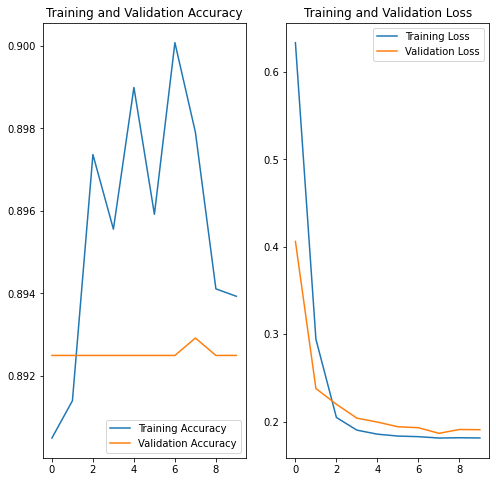

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

loss = History.history['loss']
val_loss = History.history['val_loss']

# EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#ANN
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(48,48)),
                                keras.layers.Dense(128,activation='relu') ,
                                keras.layers.Dense(30,activation='relu'),
                                keras.layers.Dense(10)
                                 ])

In [ ]:
model.input_shape

(None, 48, 48)

In [ ]:
loss_function = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='SGD',loss=loss_function,metrics=['accuracy'])
model.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
173/173 [==============================] - 1s 3ms/step - loss: 1.0683 - accuracy: 0.8928
Epoch 2/10
173/173 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.8966
Epoch 3/10
173/173 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9008
Epoch 4/10
173/173 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9053
Epoch 5/10
173/173 [==============================] - 0s 3ms/step - loss: 0.1855 - accuracy: 0.9075
Epoch 6/10
173/173 [==============================] - 0s 3ms/step - loss: 0.1799 - accuracy: 0.9064
Epoch 7/10
173/173 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9100
Epoch 8/10
173/173 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9116
Epoch 9/10
173/173 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9149
Epoch 10/10
173/173 [==============================] - 0s 2ms/step - loss: 0.1705 - accuracy: 0.9151

In [ ]:
[lossTest,accTest] = model.evaluate(Xtest,ytest)

75/75 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9051


In [ ]:
y_pred = model.predict(Xtest)
y_pred
y_pred = np.argmax(y_pred, axis=1)
acc = metrics.accuracy_score(ytest,y_pred)
report = metrics.classification_report(ytest, y_pred)
print(report) 
print('Accuracy of NN: ', acc)

pre1 = metrics.precision_score(ytest, op,average="macro")
print('precision  :' , pre1)


rc1 = metrics.recall_score(ytest, op,average="macro")
print('recall :' , rc1)

f2 = metrics.f1_score(ytest, op,average="macro")
print('f1_score  : ' , f2)

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2117
         1.0       0.53      0.07      0.13       123
         2.0       0.37      0.70      0.48       132

    accuracy                           0.91      2372
   macro avg       0.62      0.58      0.53      2372
weighted avg       0.92      0.91      0.90      2372

Accuracy of NN:  0.9051433389544689
precision  : 0.32273421395419427
recall : 0.3299175203071651
f1_score  :  0.32504824601492005


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


Text(0, 0.5, 'Accurracy')

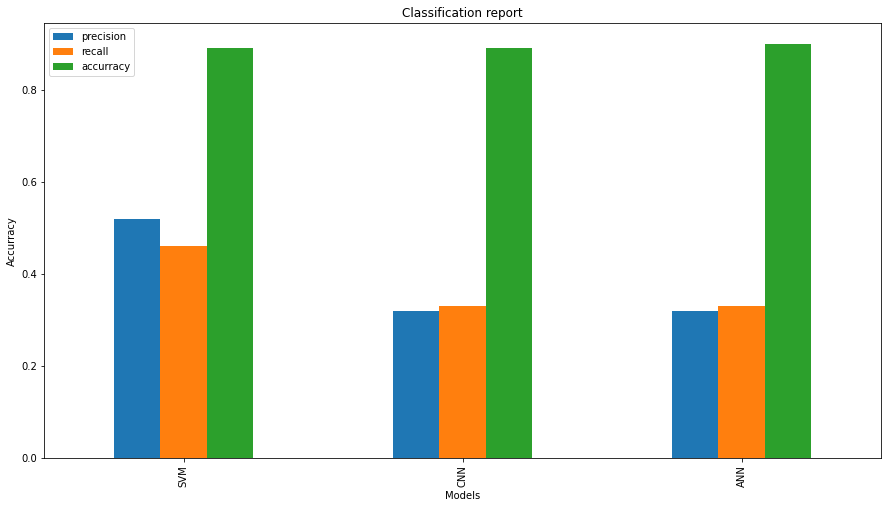

In [ ]:
import pandas as pd

plotdata = pd.DataFrame({

    "precision":[0.52,0.32,0.32],

    "recall":[0.46,0.33,0.33],
    "accurracy":[0.89,0.89, 0.90]},

    

    index=["SVM","CNN","ANN"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Classification report")

plt.xlabel("Models")

plt.ylabel("Accurracy")